# Home Credit Default Risk

### Loading the data

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
datapath = 'home-credit-default-risk/data'

In [179]:
app_train = pd.read_csv(datapath + r'/application_train.csv')
app_test = pd.read_csv(datapath + r'/application_test.csv')

In [180]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


After the loading of the main dataset, we are going to load all the secondary data and merge it to the main dataframes.

In [181]:
app_train.set_index('SK_ID_CURR', inplace=True)
app_test.set_index('SK_ID_CURR', inplace=True)
print("app_train index: ", app_train.index.name)
print("app_test index: ", app_test.index.name)

app_train index:  SK_ID_CURR
app_test index:  SK_ID_CURR


In [182]:
print(app_train.shape[0])
print(app_test.shape[0])

307511
48744


Merging bureau.csv and previous_application.csv on SK_ID_CURR

In [183]:
# read the new csv
temp_df = pd.read_csv(datapath + r'/' + 'bureau.csv')
# set the ID as index
temp_df.set_index('SK_ID_CURR', inplace = True)
# remove duplicated indexes
temp_df = temp_df.groupby(temp_df.index).first()
# merge to the main df
data_train = app_train.merge(temp_df, left_index=True, right_index=True, how='left')
data_test = app_test.merge(temp_df, left_index=True, right_index=True, how='left')

In [184]:
# read the new csv
temp_df = pd.read_csv(datapath + r'/' + 'previous_application.csv')
# set the ID as index
temp_df.set_index('SK_ID_CURR', inplace = True)
# remove duplicated indexes
temp_df = temp_df.groupby(temp_df.index).first()
# merge to the main df
data_train = data_train.merge(temp_df, left_index=True, right_index=True, how='left')
data_test = data_test.merge(temp_df, left_index=True, right_index=True, how='left')

In [185]:
data_train.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,Consumer electronics,18.0,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0


In [186]:
print(data_train.shape)
print(data_test.shape)

(307511, 173)
(48744, 172)


In [187]:
def merge_on(df_train, df_test, filename, id_name):
    # read the new csv
    temp_df = pd.read_csv(datapath + r'/' + filename)
    # set the ID as index
    temp_df.set_index(id_name, inplace = True)
    # remove duplicated indexes
    temp_df = temp_df.groupby(temp_df.index).first()
    # merge to the main df
    df_train = df_train.merge(temp_df, left_index=True, right_index=True, how='left', left_on=id_name)
    df_test = df_test.merge(temp_df, left_index=True, right_index=True, how='left', left_on=id_name)
    return [df_train, df_test]

Merging bureau_balance.csv on SK_ID_BUREAU

In [188]:
data_train, data_test = merge_on(data_train, data_test, 'bureau_balance.csv', 'SK_ID_BUREAU')

In [189]:
print(data_train.shape)
print(data_test.shape)

(307511, 175)
(48744, 174)


Merging credit_card_balance.csv, installments_payments.csv and POS_CASH_balance.csv on SK_ID_PREV

In [190]:
files = ['credit_card_balance.csv', 'installments_payments.csv', 'POS_CASH_balance.csv']
for f in files:
    data_train, data_test = merge_on(data_train, data_test, f, 'SK_ID_PREV')
print(data_train.shape)
print(data_test.shape)

(307511, 211)
(48744, 210)


## Analyzing the data

In [191]:
data_train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_y,SK_DPD_DEF_y
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
data_train.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD_y,SK_DPD_DEF_y
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here is the distribution of the **TARGET** label.

(array([282686.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

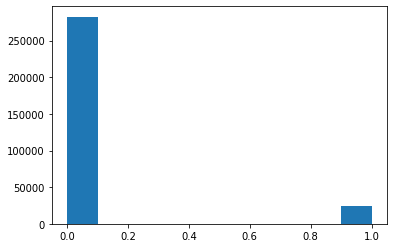

In [193]:
plt.hist(data_train['TARGET'])

As we can see the data we have for the training is **unbalanced**, this means that most of the data points have a certain TARGET label, in our case 0.

In [194]:
round((data_train['TARGET']==0).sum()*100/data_train.shape[0], 2)

91.93

More than 91% of the people don't get a loan.

### Inspecting missing values

One of the first things to do during the data analysis process is to check the missing values in the dataset and the relative amount and percentages.

In [195]:
def check_missing_values(df):
    cols = df.columns
    nan_df = pd.DataFrame(columns=['n_nan', 'perc_nan'])
    
    for col in cols:
        n_nan = pd.isna(df[col]).sum()
        perc = round((n_nan / df.shape[0])*100, 2)
        s = pd.Series({'n_nan': n_nan, 'perc_nan': perc} ,name=col)
        nan_df = nan_df.append(s)
        
    return nan_df.sort_values(by=['n_nan'], ascending=False)

In [196]:
nan_values = check_missing_values(data_train)
nan_values.head(25)

,n_nan,perc_nan
SK_DPD_DEF_y,307511.0,100.0
AMT_PAYMENT_TOTAL_CURRENT,307511.0,100.0
CNT_DRAWINGS_OTHER_CURRENT,307511.0,100.0
CNT_DRAWINGS_CURRENT,307511.0,100.0
CNT_DRAWINGS_ATM_CURRENT,307511.0,100.0
MONTHS_BALANCE_x,307511.0,100.0
STATUS,307511.0,100.0
AMT_TOTAL_RECEIVABLE,307511.0,100.0
AMT_RECIVABLE,307511.0,100.0
AMT_RECEIVABLE_PRINCIPAL,307511.0,100.0


In [197]:
nan_values[nan_values['perc_nan']>60].shape[0]

58

We are going to deal with missing values later when we are going to perform some kind of feature selection., but for now we can remove all the columns with 307511 missing values. We will also need to drop the same columns in the test dataset since they must have the same ones.

In [198]:
data_train.drop(columns=nan_values[nan_values['n_nan'] == 307511].index.to_list(), inplace=True)
data_test.drop(columns=nan_values[nan_values['n_nan'] == 307511].index.to_list(), inplace=True)

In [199]:
print(data_train.shape)
print(data_test.shape)

(307511, 173)
(48744, 172)


### Categorical features and Label encoding

Let's see how may features in the dataset are categorical, that means that are not integers or floats.

In [200]:
def get_cat_features(df):
    cat_features = {}
    for col in df.columns:
        if df[col].dtype == object:
            cat_features[col] = df[col].nunique()

    cat_features = pd.DataFrame.from_dict(cat_features, columns=['classes'], orient='index')
    return cat_features

In [201]:
cat_features_train = get_cat_features(data_train)
cat_features_train

,classes
NAME_CONTRACT_TYPE_x,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE_x,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


The same analysis can be performed on the test dataset.

In [202]:
cat_features_test = get_cat_features(data_test)
cat_features_test

,classes
NAME_CONTRACT_TYPE_x,2
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE_x,7
NAME_INCOME_TYPE,7
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,5
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


In [203]:
set(cat_features_test.index == cat_features_train.index)

{True}

As we can see the train and the test dataset have the same variables, but with different number of classes.

In [204]:
print("There are %d categorical variables" % len(cat_features_train))

There are 35 categorical variables


Now we need to convert all the categorical features into numbers, otherwise most models won't be able to deal with them.  
We have 2 ways to do it:
1. via **Label Encoding**: encoding each class into an integer
2. via **one-hot Encoding**: each class will be converted into a new column in the dataframe.

The first method is useful only when a variable has 1 or 2 classes but it is not good for encoding variables with more classes.

So, first thing, we are going to convert each variable with max 2 classes through Label Encoding.

In [205]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [206]:
def label_encoding(df, cat_features):
    for index, row in cat_features.iterrows():
        if row[0] <= 2:
            df[index] = LE.fit_transform(df[index].to_list())

In [207]:
label_encoding(data_train, cat_features_train)
label_encoding(data_test, cat_features_test)

In [208]:
print("There are %d categorical variables in app_train" % len(get_cat_features(data_train)))
print("There are %d categorical variables in app_test" % len(get_cat_features(data_test)))

There are 30 categorical variables in app_train
There are 29 categorical variables in app_test


For the categorical variable with more tha 2 classes we are going to perform, instead, one-hot encoding using the **pd.get_dummies()** function.

In [209]:
data_train = pd.get_dummies(data_train, prefix_sep='_', drop_first=True)
data_test = pd.get_dummies(data_test, prefix_sep='_', drop_first=True)

The *drop_first=True* attribute drops one column for each categorical feature to avoid multicollinearity.

In [210]:
print("There are %d categorical variables in app_train" % len(get_cat_features(data_train)))
print("There are %d categorical variables in app_test" % len(get_cat_features(data_test)))

There are 0 categorical variables in app_train
There are 0 categorical variables in app_test


In [211]:
print(data_train.shape)
print(data_test.shape)

(307511, 404)
(48744, 397)


Now the train and test datasets have different number of columns due to the encoding, so we need to keep just the common columns between the 2 dataframes.

In [212]:
# we need to keep the target column since we will need it for the training
target = data_train['TARGET']
data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)
data_train['TARGET'] = target

In [213]:
print(data_train.shape)
print(data_test.shape)

(307511, 396)
(48744, 395)
